In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [35]:
data = pd.read_csv("onData.csv", encoding = "utf-8")

In [36]:
data.describe()

,MAIN ENERGY,Efficiency
count,2160.000000,2160.000000
mean,772.320269,5.586917
std,22.470412,0.515330
min,651.930000,-0.140000
25%,758.340000,5.400000
50%,773.265000,5.670000
75%,787.695000,5.870000
max,838.420000,6.400000


In [37]:
data.head()

,MAIN ENERGY,Efficiency
0,765.16,4.90
1,770.84,5.41
2,786.30,5.02
3,800.76,4.83
4,800.76,4.83


In [38]:
data.tail()

,MAIN ENERGY,Efficiency
2155,769.94,5.76
2156,778.84,5.96
2157,762.25,6.05
2158,754.03,5.99
2159,778.91,5.28


In [39]:
data.columns

Index([' MAIN ENERGY', 'Efficiency'], dtype='object')

In [51]:
data.shape

(2160, 2)

## paired-t test for MAIN ENERGY

In [125]:
#Splitting the dataset of 200 chunks
# and appending 100 each to each list for conducting paired-t test
data1 = []
data2 = []

In [126]:
import pandas as pd

csv_file = 'onData.csv'

# Specify the column for which you want to calculate the average
column_name = ' MAIN ENERGY'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=200)


# Iterate over the chunks of data
for chunk in data_generator:
    
    
    data = chunk[column_name]
    data1.append(list(data[:100]))
    data2.append(list(data[100:]))
    

len(data1), len(data2)

(11, 11)

In [130]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value, std_deviation


for i in range(len(data1)):
    if len(data1[i]) != len(data2[i]):
        break
    # Perform the paired t-test
    t_statistic, p_value, std_deviation = paired_t_test(data1[i], data2[i])

    # Print the t-statistic and p-value
    print("Paired t-test results:")
    print(f"Standard Deviation: {std_deviation}")
    print("T-statistic:", t_statistic)
    alpha = 0.05

    # Define the degrees of freedom
    degrees_of_freedom = len(meanBefore)

    # Calculate the critical t-value
    t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

    # Print the critical t-value
    print(f"Critical t-value: {t_critical}")
    print(f"Null Hypothesis is {t_statistic==t_critical} \n")

Paired t-test results:
Standard Deviation: 26.11625978217595
T-statistic: -3.109863383095552
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 34.96592045654936
T-statistic: 0.8069571637635817
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 33.48167740509108
T-statistic: -1.8709934762848737
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 29.123149989191237
T-statistic: 0.8534791054273015
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 24.64185663242381
T-statistic: -3.011664303831328
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 38.113467321574504
T-statistic: -0.19174324755972
Critical t-value: 2.0738730679040147
Null Hypothesis is False 

Paired t-test results:
Standard Deviation: 29.7951976599

In [69]:
meanBefore = []
meanAfter = []

In [70]:
import pandas as pd

csv_file = 'onData.csv'

# Specify the column for which you want to calculate the average
column_name = ' MAIN ENERGY'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=100)

# Initialize variables
total_sum = 0
total_count = 0

# Iterate over the chunks of data
for chunk in data_generator:
    # Calculate the sum and count for the specified column in each chunk
    chunk_sum = chunk[column_name].sum()
    chunk_count = chunk[column_name].count()
    value = round(chunk_sum/chunk_count, 2)
    meanBefore.append(value)
    
    # Update the total sum and count
    total_sum += chunk_sum
    total_count += chunk_count
    value = round(total_sum/total_count, 2)
    meanAfter.append(value)

# Calculate the average
average = round(total_sum / total_count, 2)

print("Average of column '{}' in the CSV file: {}".format(column_name, average))


Average of column ' MAIN ENERGY' in the CSV file: 772.32


In [71]:
len(meanBefore), len(meanAfter)

(22, 22)

In [72]:
for i in range(len(meanBefore)):
    print(f"{meanBefore[i]}, {meanAfter[i]}")

778.21, 778.21
770.09, 774.15
766.97, 771.75
769.79, 771.26
773.01, 771.61
766.75, 770.8
768.98, 770.54
771.47, 770.66
776.73, 771.33
769.31, 771.13
772.32, 771.24
771.59, 771.27
779.85, 771.93
780.36, 772.53
774.59, 772.67
777.05, 772.94
763.81, 772.41
763.29, 771.9
770.97, 771.85
778.06, 772.16
774.99, 772.3
773.19, 772.32


In [73]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value


# Perform the paired t-test
t_statistic, p_value = paired_t_test(meanBefore, meanAfter)

# Print the t-statistic and p-value
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


alpha = 0.05

# Define the degrees of freedom
degrees_of_freedom = len(meanBefore)

# Calculate the critical t-value
t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

# Print the critical t-value
print("Critical t-value:", t_critical)


Paired t-test results:
T-statistic: -0.2077484055063241
P-value: 0.8374269161902816
Critical t-value: 2.0738730679040147


In [2]:
means = []
stddev = []

In [3]:
import pandas as pd
import numpy as np

# Specify the path to the CSV file
csv_file = 'onData.csv'

# Specify the column for which you want to calculate the standard deviation and average
column_name = ' MAIN ENERGY'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=100)

# Initialize variables
total_sum = 0
total_count = 0
total_squared_diff = 0

# Iterate over the chunks of data
for chunk in data_generator:
    # Calculate the sum and count for the specified column in each chunk
    chunk_sum = chunk[column_name].sum()
    chunk_count = chunk[column_name].count()
    
    # Update the total sum and count
    total_sum += chunk_sum
    total_count += chunk_count

    # Calculate the squared differences for each value in the chunk
    chunk_squared_diff = np.sum((chunk[column_name] - chunk[column_name].mean()) ** 2)
    total_squared_diff += chunk_squared_diff
    
    meanvalue = round(total_sum/total_count, 2)
    means.append(meanvalue)
    
    variance = total_squared_diff / (total_count - 1)
    std_deviation = np.sqrt(variance)
    stdvalue = round(std_deviation, 2)
    stddev.append(stdvalue)

# Calculate the average
average = total_sum / total_count

# Calculate the standard deviation
variance = total_squared_diff / (total_count - 1)
std_deviation = np.sqrt(variance)

# Print the standard deviation and average
print("Standard Deviation of column '{}' in the CSV file: {}".format(column_name, std_deviation))
print("Average of column '{}' in the CSV file: {}".format(column_name, average))


Standard Deviation of column ' MAIN ENERGY' in the CSV file: 21.957326220590918
Average of column ' MAIN ENERGY' in the CSV file: 772.3202685185184


In [4]:
len(means), len(stddev)

(22, 22)

In [5]:
for i in range(len(means)):
    print(f"{means[i]}, {stddev[i]}")

778.21, 18.21
774.15, 19.8
771.75, 21.28
771.26, 22.46
771.61, 22.05
770.8, 22.91
770.54, 22.55
770.66, 22.52
771.33, 22.24
771.13, 21.83
771.24, 21.78
771.27, 21.89
771.93, 21.95
772.53, 21.7
772.67, 22.02
772.94, 21.78
772.41, 21.94
771.9, 22.52
771.85, 22.34
772.16, 22.29
772.3, 22.04
772.32, 21.96


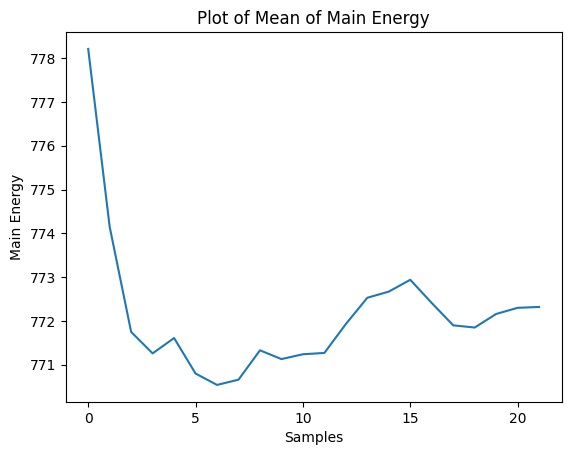

In [11]:
import matplotlib.pyplot as plt

def plot_list_data(data):
    x_axis = range(len(data))

    plt.plot(x_axis, data)
    plt.xlabel('Samples')
    plt.ylabel('Main Energy')
    plt.title('Plot of Mean of Main Energy')
    plt.show()


plot_list_data(means)


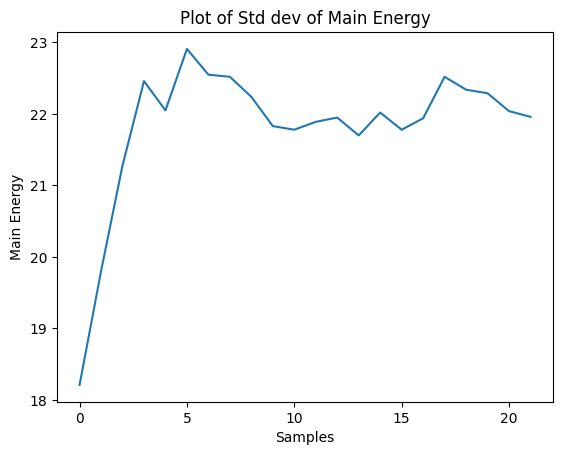

In [10]:
import matplotlib.pyplot as plt

def plot_list_data(data):
    x_axis = range(len(data))

    plt.plot(x_axis, data)
    plt.xlabel('Samples')
    plt.ylabel('Main Energy')
    plt.title('Plot of Std dev of Main Energy')
    plt.show()


plot_list_data(stddev)


In [17]:
means = []
stddev = []

In [18]:
import pandas as pd
import numpy as np

# Specify the path to the CSV file
csv_file = 'onData.csv'

# Specify the column for which you want to calculate the standard deviation and average
column_name = 'Efficiency'

# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=100)

# Initialize variables
total_sum = 0
total_count = 0
total_squared_diff = 0

# Iterate over the chunks of data
for chunk in data_generator:
    # Calculate the sum and count for the specified column in each chunk
    chunk_sum = chunk[column_name].sum()
    chunk_count = chunk[column_name].count()
    
    # Update the total sum and count
    total_sum += chunk_sum
    total_count += chunk_count

    # Calculate the squared differences for each value in the chunk
    chunk_squared_diff = np.sum((chunk[column_name] - chunk[column_name].mean()) ** 2)
    total_squared_diff += chunk_squared_diff
    
    meanvalue = round(total_sum/total_count, 2)
    means.append(meanvalue)
    
    variance = total_squared_diff / (total_count - 1)
    std_deviation = np.sqrt(variance)
    stdvalue = round(std_deviation, 2)
    stddev.append(stdvalue)

# Calculate the average
average = total_sum / total_count

# Calculate the standard deviation
variance = total_squared_diff / (total_count - 1)
std_deviation = np.sqrt(variance)

# Print the standard deviation and average
print("Standard Deviation of column '{}' in the CSV file: {}".format(column_name, std_deviation))
print("Average of column '{}' in the CSV file: {}".format(column_name, average))


Standard Deviation of column 'Efficiency' in the CSV file: 0.47977447387013616
Average of column 'Efficiency' in the CSV file: 5.586916666666667


In [19]:
len(means), len(stddev)

(22, 22)

In [20]:
for i in range(len(means)):
    print(f"{means[i]}, {stddev[i]}")

5.61, 0.32
5.67, 0.38
5.68, 0.38
5.6, 0.58
5.6, 0.56
5.62, 0.58
5.64, 0.55
5.64, 0.54
5.66, 0.51
5.68, 0.51
5.68, 0.49
5.67, 0.48
5.67, 0.47
5.67, 0.48
5.65, 0.48
5.62, 0.47
5.6, 0.48
5.58, 0.51
5.58, 0.5
5.58, 0.49
5.58, 0.48
5.59, 0.48


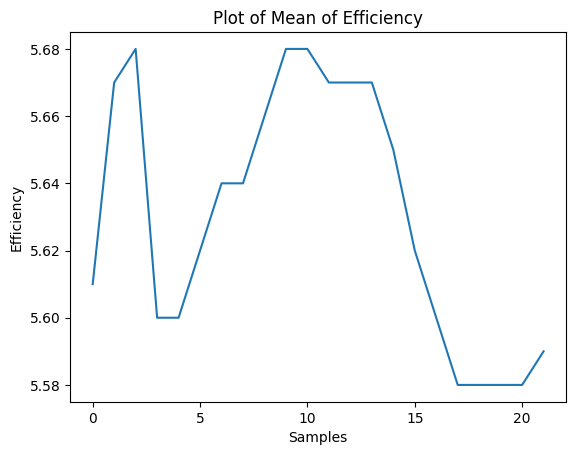

In [22]:
import matplotlib.pyplot as plt

def plot_list_data(data):
    x_axis = range(len(data))

    plt.plot(x_axis, data)
    plt.xlabel('Samples')
    plt.ylabel('Efficiency')
    plt.title('Plot of Mean of Efficiency')
    plt.show()


plot_list_data(means)


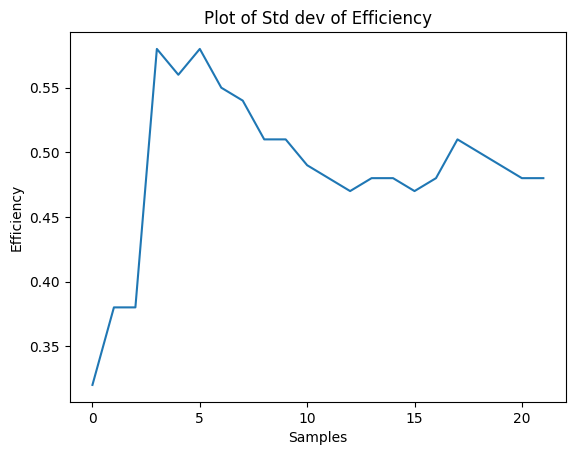

In [23]:
import matplotlib.pyplot as plt

def plot_list_data(data):
    x_axis = range(len(data))

    plt.plot(x_axis, data)
    plt.xlabel('Samples')
    plt.ylabel('Efficiency')
    plt.title('Plot of Std dev of Efficiency')
    plt.show()


plot_list_data(stddev)


In [94]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value


# Perform the paired t-test
t_statistic, p_value = paired_t_test(means, stddev)

# Print the t-statistic and p-value
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


alpha = 0.05

# Define the degrees of freedom
degrees_of_freedom = len(means)

# Calculate the critical t-value
t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

# Print the critical t-value
print("Critical t-value:", t_critical)


Paired t-test results:
T-statistic: -1382.526689988225
P-value: 0.0
Critical t-value: 2.0738730679040147


## paired-t test for Efficiency

In [80]:
meanBefore = []
meanAfter = []

In [81]:
import pandas as pd

# Specify the path to the CSV file
csv_file = 'onData.csv'

# Specify the column for which you want to calculate the average
column_name = 'Efficiency'


# Create a generator object to read the CSV file in chunks
data_generator = pd.read_csv(csv_file, chunksize=100)

# Initialize variables
total_sum = 0
total_count = 0

# Iterate over the chunks of data
for chunk in data_generator:
    # Calculate the sum and count for the specified column in each chunk
    chunk_sum = chunk[column_name].sum()
    chunk_count = chunk[column_name].count()
    value = round(chunk_sum/chunk_count, 2)
    meanBefore.append(value)
    
    # Update the total sum and count
    total_sum += chunk_sum
    total_count += chunk_count
    value = round(total_sum/total_count, 2)
    meanAfter.append(value)

# Calculate the average
average = total_sum / total_count

print("Average of column '{}' in the CSV file: {}".format(column_name, average))


Average of column 'Efficiency' in the CSV file: 5.586916666666667


In [82]:
import math
from scipy.stats import t

def paired_t_test(before, after):
    # Calculate the differences between paired observations
    differences = [after[i] - before[i] for i in range(len(before))]

    # Calculate the mean of the differences
    mean_difference = sum(differences) / len(differences)

    # Calculate the standard deviation of the differences
    sum_squared_diff = sum((d - mean_difference) ** 2 for d in differences)
    variance = sum_squared_diff / (len(differences) - 1)
    std_deviation = math.sqrt(variance)

    # Calculate the standard error of the mean difference
    std_error = std_deviation / math.sqrt(len(differences))

    # Calculate the t-statistic
    t_statistic = mean_difference / std_error

    # Calculate the degrees of freedom
    degrees_of_freedom = len(differences) - 1

    # Calculate the critical value for a specific significance level (e.g., 0.05)
    critical_value = 2.262

    # Calculate the p-value
    p_value = 2 * (1 - t.cdf(abs(t_statistic), degrees_of_freedom))

    # Return the t-statistic and p-value
    return t_statistic, p_value


# Perform the paired t-test
t_statistic, p_value = paired_t_test(meanBefore, meanAfter)

# Print the t-statistic and p-value
print("Paired t-test results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


alpha = 0.05

# Define the degrees of freedom
degrees_of_freedom = len(meanBefore)

# Calculate the critical t-value
t_critical = t.ppf(1 - alpha/2, degrees_of_freedom)

# Print the critical t-value
print("Critical t-value:", t_critical)

Paired t-test results:
T-statistic: 1.1175279765091048
P-value: 0.2763911908105936
Critical t-value: 2.0738730679040147


In [74]:
df = pd.read_csv("columns.csv")

In [75]:
df.head()

,NH3\nPRE_CLR\nNH3_LVL\n(%),NH3\nPRE_CLR_NH3\nPRES\n(psi),CO2\nPRE_CLR_KOBWAT_LVL\n(%),CO2 PRE_CLR_OL_TEMP\n(?C),CO2 SUC\nPRES\n(kg/cm?),CO2 SUC\nTEMP\n(?C),CO2 INTER\nPRES\n(kg/cm?),CO2 INTER\nTEMP\n(?C),CO2 DISH\nPRES\n(kg/cm?),CO2\nDISH\nTEMP\n(?C),...,NH3\nOIL_CLR_OL\nTEMP\n(?C),NH3\nOIL_CLR_IL\nPRES\n(psi),NH3\nCOND_WAT\nIL_TEMP\n(?C),NH3\nCOND_NH3\nOL_TEMP\n(?C),NH3\nMANIFOLD\nTEMP\n(?C),NH3\nPHE_NH3\nIL_TEMP\n(?C),NH3\nPHE_NH3\nOL_TEMP\n(?C),NH3\nINTER_NH3\nTEMP\n(?C),WET BULB\n(?C),DRY BULB\n(?C)
0,25.76,43.11,0.26,7.1,0.36,7.1,3.7,82.2,20.8,94.6,...,21.0,1.95,21.0,21.0,-12.0,25.0,12.0,18.88,19.0,21.0
1,29.04,41.43,0.05,6.5,0.36,6.5,3.7,82.1,20.8,94.5,...,21.0,1.94,21.0,21.0,-11.0,25.0,3.0,47.76,18.0,21.0
2,25.03,43.46,0.02,7.1,0.37,7.1,3.7,82.2,20.8,94.7,...,21.0,1.93,21.0,21.0,-14.0,25.0,9.0,11.46,18.0,21.0
3,24.95,45.11,0.39,6.8,0.37,6.8,3.7,82.2,20.9,94.7,...,21.0,1.95,21.0,21.0,-10.0,25.0,12.0,35.35,18.0,21.0
4,24.95,45.11,0.21,6.8,0.37,6.8,3.7,82.2,20.9,94.7,...,21.0,1.93,21.0,21.0,-9.0,25.0,12.0,45.25,18.0,21.0


In [76]:
df.shape

(2160, 79)

In [78]:
df.corr()

C:\Users\Jathin Shyam\AppData\Local\Temp\ipykernel_1404\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,NH3\nPRE_CLR\nNH3_LVL\n(%),NH3\nPRE_CLR_NH3\nPRES\n(psi),CO2\nPRE_CLR_KOBWAT_LVL\n(%),CO2 PRE_CLR_OL_TEMP\n(?C),CO2 SUC\nPRES\n(kg/cm?),CO2 SUC\nTEMP\n(?C),CO2 INTER\nPRES\n(kg/cm?),CO2 INTER\nTEMP\n(?C),CO2 DISH\nPRES\n(kg/cm?),CO2\nDISH\nTEMP\n(?C),...,NH3\nOIL_CLR_OL\nTEMP\n(?C),NH3\nOIL_CLR_IL\nPRES\n(psi),NH3\nCOND_WAT\nIL_TEMP\n(?C),NH3\nCOND_NH3\nOL_TEMP\n(?C),NH3\nMANIFOLD\nTEMP\n(?C),NH3\nPHE_NH3\nIL_TEMP\n(?C),NH3\nPHE_NH3\nOL_TEMP\n(?C),NH3\nINTER_NH3\nTEMP\n(?C),WET BULB\n(?C),DRY BULB\n(?C)
NH3\nPRE_CLR\nNH3_LVL\n(%),1.000000,0.238983,0.003889,0.001135,0.010193,0.001135,0.001135,-0.004655,-0.001135,-0.004373,...,-0.045659,-0.001135,-0.045462,-0.000655,-0.007950,0.190084,0.050251,-0.010256,0.138676,-0.024182
NH3\nPRE_CLR_NH3\nPRES\n(psi),0.238983,1.000000,0.025716,-0.013865,0.290896,-0.013865,-0.013865,0.491158,0.001773,0.463330,...,0.384245,0.095692,0.369854,-0.009860,-0.154804,0.706026,0.388374,0.091666,0.540474,0.436114
CO2\nPRE_CLR_KOBWAT_LVL\n(%),0.003889,0.025716,1.000000,-0.004788,0.026268,-0.004788,-0.004788,0.022456,0.004443,0.018564,...,0.137505,0.005391,0.135408,0.002376,0.040114,0.083968,0.094945,0.059397,0.136374,0.115561
CO2 PRE_CLR_OL_TEMP\n(?C),0.001135,-0.013865,-0.004788,1.000000,-0.302130,1.000000,1.000000,-0.413754,0.001391,-0.133597,...,-0.017528,0.001391,-0.017280,0.000803,-0.027558,-0.014842,-0.017050,-0.019607,0.000389,-0.015404
CO2 SUC\nPRES\n(kg/cm?),0.010193,0.290896,0.026268,-0.302130,1.000000,-0.302130,-0.302130,0.722066,0.003229,0.628496,...,-0.020775,-0.017932,-0.020413,0.000337,-0.326416,0.071308,0.070437,0.233235,-0.016899,0.019681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NH3\nPHE_NH3\nIL_TEMP\n(?C),0.190084,0.706026,0.083968,-0.014842,0.071308,-0.014842,-0.014842,0.429753,0.003215,0.391895,...,0.753568,0.075886,0.740802,0.003533,-0.058067,1.000000,0.278007,0.018625,0.786813,0.758498
NH3\nPHE_NH3\nOL_TEMP\n(?C),0.050251,0.388374,0.094945,-0.017050,0.070437,-0.017050,-0.017050,0.130502,0.009195,0.110680,...,0.243951,0.021841,0.238134,-0.000737,0.026164,0.278007,1.000000,0.270587,0.209349,0.220806
NH3\nINTER_NH3\nTEMP\n(?C),-0.010256,0.091666,0.059397,-0.019607,0.233235,-0.019607,-0.019607,0.174948,0.034338,0.147808,...,0.065312,0.017434,0.083730,0.046374,0.193722,0.018625,0.270587,1.000000,-0.002430,0.029679
WET BULB\n(?C),0.138676,0.540474,0.136374,0.000389,-0.016899,0.000389,0.000389,0.311960,-0.041584,0.293512,...,0.603929,0.062776,0.597427,0.002945,-0.015872,0.786813,0.209349,-0.002430,1.000000,0.632071


### New Task


In [12]:
def get_all_outlier_indexes(data):
    all_outlier_indexes = set()  # Use a set to store the outlier indexes
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the indexes of outliers for the current column and add them to the all_outlier_indexes set
        outlier_indexes = set(data[(data[column] < lower_bound) | (data[column] > upper_bound)].index)
        all_outlier_indexes.update(outlier_indexes)

    return all_outlier_indexes

def remove_outliers(data, outlier_indexes):
    # Remove rows containing outliers based on the given outlier_indexes set
    cleaned_data = data.drop(index=outlier_indexes).reset_index(drop=True)
    return cleaned_data

In [13]:
import pandas as pd

## SUCTION PRE CHILLER B2

###  N7 to N9

In [3]:
import pandas as pd #5.5
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data= pd.read_csv("onData.csv")

In [5]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency\n[Kg/unit]', 'N7', 'N9', 'S2',
       'S2.1', 'S3', 'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5',
       'S4.2', 'S4.3', 'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1',
       'S6', 'S6.1', 'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17',
       'S17.1', 'S17.2', 'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20',
       'N11', 'S23', 'N1', 'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B',
       'N2B.1', 'N2B.2', 'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4',
       'N2A.2', 'N2.2', 'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [7]:
data = data[['Efficiency\n[Kg/unit]', 'N7', 'N9']]

In [8]:
data.shape

(2160, 3)

In [9]:
data.describe()

,Efficiency\n[Kg/unit],N7,N9
count,2160.000000,2.160000e+03,2160.000000
mean,5.586917,-8.076139e+26,43.982981
std,0.515330,2.653475e+28,5.604111
min,-0.140000,-8.722230e+29,0.000000
25%,5.400000,2.523000e+01,42.500000
50%,5.670000,2.607000e+01,44.420000
75%,5.870000,2.712000e+01,46.380000
max,6.400000,2.904000e+01,66.920000


In [14]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [15]:
cleaned_data.describe()

,Efficiency\n[Kg/unit],N7,N9
count,2051.000000,2051.000000,2051.000000
mean,5.639098,26.129790,44.561643
std,0.321565,1.264205,2.736805
min,4.700000,22.400000,36.690000
25%,5.420000,25.285000,42.650000
50%,5.680000,26.110000,44.490000
75%,5.870000,27.140000,46.425000
max,6.400000,29.040000,52.180000


In [16]:
cleaned_data.shape

(2051, 3)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency\n[Kg/unit]', 'N7']]
y = cleaned_data[ 'N9']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 7.072186629624106
R² Score: 0.00836966241507131

Support Vector Regression:
MSE: 6.73920715516802
R² Score: 0.055058553129666454

Random Forest Regressor:
MSE: 8.834127936707617
R² Score: -0.23868185710074163

Decision Tree Regressor:
MSE: 7.198936066758853
R² Score: -0.00940257603352146

Gradient Boosting Regressor:
MSE: 7.007683339809278
R² Score: 0.017414024845565756

K-Nearest Neighbors Regressor:
MSE: 8.372495610705597
R² Score: -0.17395383969294453

Bayesian Ridge Regression:
MSE: 7.06782752358108
R² Score: 0.008980876742887278

 Maximum R-Squared Value is : 0.055058553129666454


In [23]:
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

In [29]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_svr), max(y_pred_svr))

In [30]:
print(target_range)

(40.920714732376524, 45.90145414636166)


In [28]:
new_data = pd.DataFrame({'Efficiency\n[Kg/unit]': [5.5],'N7':[26.129790]})
predicted_target = gb_reg .predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: 45.40


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## KOB B3


### S2 to S3

In [69]:
data = pd.read_csv("all.csv")

In [70]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [71]:
data = data[['Efficiency','S2','S2.1', 'S3', 'S3.1', 'S3.2', 'S3.3', 'S3.4', 'S3.5']]

In [72]:
data.shape

(2160, 9)

In [73]:
data.describe()

,Efficiency,S2,S2.1,S3,S3.1,S3.2,S3.3,S3.4,S3.5
count,2160.000000,2160.000000,2.160000e+03,2160.000000,2.160000e+03,2.160000e+03,2160.000000,2160.000000,2160.000000
mean,5.586917,1.873083,3.416667e+29,0.380736,3.416667e+29,3.277778e+17,82.956667,23.853472,76.532176
std,0.515330,12.983698,9.163631e+30,0.047007,9.163631e+30,8.791126e+18,7.479027,2.076969,6.900858
min,-0.140000,-0.090000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,5.400000,0.060000,5.900000e+00,0.360000,5.900000e+00,3.800000e+00,82.800000,23.900000,76.300000
50%,5.670000,0.250000,6.900000e+00,0.380000,6.900000e+00,3.800000e+00,83.600000,24.000000,77.200000
75%,5.870000,0.380000,8.300000e+00,0.400000,8.300000e+00,3.900000e+00,84.400000,24.100000,77.800000
max,6.400000,104.560000,2.460000e+32,0.660000,2.460000e+32,2.360000e+20,86.700000,25.900000,80.200000


In [74]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [75]:
cleaned_data.describe()

,Efficiency,S2,S2.1,S3,S3.1,S3.2,S3.3,S3.4,S3.5
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,5.645735,0.221173,7.145821,0.385373,7.145821,3.826586,83.632075,24.023112,77.145166
std,0.316568,0.159893,1.605483,0.024738,1.605483,0.073749,1.064567,0.116085,1.014956
min,4.700000,-0.090000,3.500000,0.320000,3.500000,3.700000,80.900000,23.600000,74.600000
25%,5.440000,0.060000,5.900000,0.360000,5.900000,3.800000,82.800000,24.000000,76.400000
50%,5.690000,0.250000,6.900000,0.380000,6.900000,3.800000,83.600000,24.000000,77.200000
75%,5.870000,0.370000,8.300000,0.400000,8.300000,3.900000,84.400000,24.100000,77.800000
max,6.400000,0.460000,11.800000,0.460000,11.800000,4.000000,86.700000,24.400000,80.000000


In [63]:
cleaned_data.shape

(2046, 4)

In [82]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S2','S2.1', 'S3', 'S3.1', 'S3.2', 'S3.3', 'S3.4']]
y = cleaned_data['S3.5']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [83]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.0053240256849983545
R² Score: 0.9948369315179636

Support Vector Regression:
MSE: 0.005088051284693887
R² Score: 0.9950657718844202

Random Forest Regressor:
MSE: 0.006328912060302366
R² Score: 0.9938624251050853

Decision Tree Regressor:
MSE: 0.018883235258111607
R² Score: 0.9816876471736886

Gradient Boosting Regressor:
MSE: 0.005103494472133386
R² Score: 0.9950507955790737

K-Nearest Neighbors Regressor:
MSE: 0.014795979899497465
R² Score: 0.9856513356621865

Bayesian Ridge Regression:
MSE: 0.005331961394471837
R² Score: 0.9948292357227347

 Maximum R-Squared Value is : 0.9950657718844202


In [84]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_svr), max(y_pred_svr))

In [85]:
print(target_range)

(74.86961841232022, 79.95907404787476)


In [86]:
new_data = pd.DataFrame({'Efficiency': [5],'S2': [0.221173],'S2.1':[7.145821], 'S3': [0.385373], 'S3.1': [7.145821], 'S3.2': [3.826586], 'S3.3':[83.632075], 'S3.4':[24.023112]})

predicted_target = svr.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: 77.16


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## CO2 COMPRESSOR B4 AND B4A

### S3 TO S4

In [237]:
data = pd.read_csv("all.csv")

In [238]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [239]:
data = data[['Efficiency','S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8']]

In [240]:
data.shape

(2160, 16)

In [241]:
data.describe()

,Efficiency,S3,S3.1,S3.2,S3.3,S4,S4.1,S3.4,S3.5,S4.2,S4.3,S4.4,S4.5,S4.6,S4.7,S4.8
count,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2160.000000,2.160000e+03,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2160.000000,2.160000e+03,2.160000e+03,2160.000000,2.160000e+03
mean,5.586917,0.380736,3.416667e+29,3.277778e+17,82.956667,-1.211111e+27,95.433741,23.853472,76.532176,7.111111e+28,5.962963e+25,307.417389,8.777778e+27,1.592593e+32,98.178981,2.861111e+26
std,0.515330,0.047007,9.163631e+30,8.791126e+18,7.479027,3.248247e+28,8.817767,2.076969,6.900858,2.336408e+30,1.959176e+27,14141.122456,2.038354e+29,3.307074e+33,9.546994,9.400393e+27
min,-0.140000,0.000000,0.000000e+00,0.000000e+00,0.000000,-8.720000e+29,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.100000,0.000000e+00,2.960000e+02,0.000000,0.000000e+00
25%,5.400000,0.360000,5.900000e+00,3.800000e+00,82.800000,2.080000e+01,95.500000,23.900000,76.300000,2.030000e+01,4.000000e-01,3.100000,0.000000e+00,4.140000e+02,99.600000,1.000000e+02
50%,5.670000,0.380000,6.900000e+00,3.800000e+00,83.600000,2.080000e+01,96.300000,24.000000,77.200000,2.040000e+01,4.000000e-01,3.200000,0.000000e+00,4.265000e+02,100.000000,1.000000e+02
75%,5.870000,0.400000,8.300000e+00,3.900000e+00,84.400000,2.090000e+01,97.000000,24.100000,77.800000,2.050000e+01,5.000000e-01,3.200000,0.000000e+00,4.400000e+02,100.000000,1.000000e+02
max,6.400000,0.660000,2.460000e+32,2.360000e+20,86.700000,6.880000e+11,99.000000,25.900000,80.200000,7.680000e+31,6.440000e+28,657223.130000,4.740000e+30,6.880000e+34,100.000000,3.090000e+29


In [242]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [243]:
cleaned_data.shape

(1485, 16)

In [244]:
cleaned_data.describe()

,Efficiency,S3,S3.1,S3.2,S3.3,S4,S4.1,S3.4,S3.5,S4.2,S4.3,S4.4,S4.5,S4.6,S4.7,S4.8
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.0,1485.000000,1485.000000,1485.0
mean,5.625084,0.382848,7.044916,3.817374,83.487811,20.841145,96.150909,24.017239,77.003906,20.415488,0.427811,3.174478,0.0,425.749495,99.911448,100.0
std,0.322344,0.022536,1.536987,0.070385,1.036344,0.094584,0.947863,0.091036,0.991119,0.095321,0.045568,0.045872,0.0,17.243672,0.238319,0.0
min,4.700000,0.320000,3.600000,3.700000,80.900000,20.700000,93.300000,23.700000,74.600000,20.100000,0.300000,3.100000,0.0,384.000000,99.000000,100.0
25%,5.400000,0.360000,5.900000,3.800000,82.700000,20.800000,95.500000,24.000000,76.200000,20.400000,0.400000,3.100000,0.0,413.000000,100.000000,100.0
50%,5.670000,0.380000,6.800000,3.800000,83.400000,20.800000,96.100000,24.000000,76.900000,20.400000,0.400000,3.200000,0.0,425.000000,100.000000,100.0
75%,5.870000,0.400000,8.000000,3.900000,84.200000,20.900000,96.800000,24.100000,77.700000,20.500000,0.500000,3.200000,0.0,437.000000,100.000000,100.0
max,6.400000,0.450000,11.800000,4.000000,86.700000,21.000000,99.000000,24.300000,80.000000,20.700001,0.500000,3.300000,0.0,475.000000,100.000000,100.0


In [245]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8']]
y = cleaned_data['S4.1']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [246]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.016504988939655612
R² Score: 0.9809547854845249

Support Vector Regression:
MSE: 0.03188973722318858
R² Score: 0.9632022239773501

Random Forest Regressor:
MSE: 0.012794279461279427
R² Score: 0.9852365973826523

Decision Tree Regressor:
MSE: 0.022390960267314748
R² Score: 0.9741629247339932

Gradient Boosting Regressor:
MSE: 0.012390717373774446
R² Score: 0.9857022703106953

K-Nearest Neighbors Regressor:
MSE: 0.05390572390572359
R² Score: 0.937797833179408

Bayesian Ridge Regression:
MSE: 0.01660171906779032
R² Score: 0.98084316795802

 Maximum R-Squared Value is : 0.9857022703106953


In [247]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_gb), max(y_pred_gb))

In [248]:
print(target_range)

(94.07138289326824, 98.59317417522972)


In [249]:
new_data = pd.DataFrame({'Efficiency' : [5],'S3' : [0.382848],
       'S3.1': [7.044916], 'S3.2': [3.817374], 'S3.3':[83.487811], 'S4':[20.841145], 'S3.4':[24.017239],
        'S3.5':[77.003906], 'S4.2':[20.415488], 'S4.3':[0.427811],
       'S4.4':[3.174478], 'S4.5':[0.0], 'S4.6':[425.749495], 'S4.7':[99.911448], 'S4.8':[100.0]})



predicted_target = gb_reg.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: 96.12


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## AFTER COOLER B5

### S5 to S6

In [224]:
data = pd.read_csv("all.csv")

In [225]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [226]:
data = data[['Efficiency','S5', 'S5.1', 'S6', 'S6.1','S6.2']]

In [227]:
data.shape

(2160, 6)

In [228]:
data.describe()

,Efficiency,S5,S5.1,S6,S6.1,S6.2
count,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03,2160.000000
mean,5.586917,1.046296e+28,5.129630e+17,3.408565e+01,4.185185e+27,86.819061
std,0.515330,2.172671e+29,1.191190e+19,3.692886e+00,1.375074e+29,60.387143
min,-0.140000,2.240000e+00,1.689280e-04,1.380000e-19,0.000000e+00,-96.000000
25%,5.400000,2.420000e+00,2.900000e+01,3.200000e+01,2.800000e+01,45.000000
50%,5.670000,2.470000e+00,3.100000e+01,3.400000e+01,3.000000e+01,77.000000
75%,5.870000,2.520000e+00,3.300000e+01,3.700000e+01,3.300000e+01,120.000000
max,6.400000,4.520000e+30,2.770000e+20,3.900000e+01,4.520000e+30,447.000000


In [229]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [230]:
cleaned_data.shape

(2019, 6)

In [231]:
cleaned_data.describe()

,Efficiency,S5,S5.1,S6,S6.1,S6.2
count,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
mean,5.638093,2.467350,31.033680,34.249133,30.286280,83.838534
std,0.322245,0.064721,2.989551,2.978589,2.811604,52.762729
min,4.700000,2.270000,25.000000,28.000000,24.000000,-64.000000
25%,5.420000,2.420000,29.000000,32.000000,28.000000,45.000000
50%,5.680000,2.470000,31.000000,35.000000,30.000000,76.000000
75%,5.870000,2.520000,34.000000,37.000000,33.000000,117.000000
max,6.400000,2.660000,36.000000,39.000000,35.000000,230.000000


In [232]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S5', 'S5.1', 'S6.1',
       'S6.2']]
y = cleaned_data['S6']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [233]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.1421619956137506
R² Score: 0.9845273800125272

Support Vector Regression:
MSE: 0.521715819067293
R² Score: 0.9432175204418659

Random Forest Regressor:
MSE: 0.14789331683168308
R² Score: 0.9839035947677551

Decision Tree Regressor:
MSE: 0.1452784037450679
R² Score: 0.9841881965441638

Gradient Boosting Regressor:
MSE: 0.13906629385664263
R² Score: 0.9848643098415965

K-Nearest Neighbors Regressor:
MSE: 0.4334653465346532
R² Score: 0.9528225208452252

Bayesian Ridge Regression:
MSE: 0.14235808345815823
R² Score: 0.9845060382137745

 Maximum R-Squared Value is : 0.9848643098415965


In [234]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_gb), max(y_pred_gb))

In [235]:
print(target_range)

(28.0174581061875, 39.06183967294087)


In [236]:
new_data = pd.DataFrame({'Efficiency':[5],'S5':[2.467350], 'S5.1':[31.033680], 'S6.1':[30.286280],'S6.2':[83.838534]})



predicted_target = gb_reg.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: 34.22


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## REBOILER B15

### S17 to S18

In [211]:
data = pd.read_csv("all.csv")

In [212]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [213]:
data = data[['Efficiency','S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4']]

In [214]:
data.shape

(2160, 7)

In [215]:
data.describe()

,Efficiency,S17,S17.1,S17.2,S17.3,S18,S17.4
count,2160.000000,2160.000000,2160.000000,2.160000e+03,2.160000e+03,2.160000e+03,2.160000e+03
mean,5.586917,6.651398,255.242440,2.889435e+03,1.995370e+18,2.278057e+29,1.464815e+28
std,0.515330,4.649246,26.068314,1.285796e+05,9.273643e+19,7.483807e+30,2.569545e+29
min,-0.140000,-5.010000,0.000000,-1.498916e+06,0.000000e+00,-1.700000e+01,0.000000e+00
25%,5.400000,4.030000,257.117500,9.977950e+02,6.000000e+00,-1.600000e+01,6.965000e+01
50%,5.670000,5.300000,257.620000,1.046595e+03,8.000000e+00,-1.600000e+01,7.144000e+01
75%,5.870000,7.232500,258.240000,1.081750e+03,1.000000e+01,-1.500000e+01,7.338000e+01
max,6.400000,31.070000,301.300000,1.461640e+06,4.310000e+21,2.460000e+32,4.520000e+30


In [216]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [217]:
cleaned_data.shape

(1507, 7)

In [218]:
cleaned_data.describe()

,Efficiency,S17,S17.1,S17.2,S17.3,S18,S17.4
count,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000,1507.000000
mean,5.623331,5.490259,257.643132,1031.983477,8.017253,-15.810219,71.198268
std,0.331759,2.151838,0.669495,47.323471,2.658464,0.435572,2.730778
min,4.700000,1.770000,255.510000,886.000000,3.000000,-17.000000,64.110000
25%,5.390000,3.980000,257.160000,999.750000,6.000000,-16.000000,69.875000
50%,5.660000,5.140000,257.570000,1043.190000,8.000000,-16.000000,71.480000
75%,5.870000,6.450000,258.080000,1076.755000,9.000000,-16.000000,73.310000
max,6.400000,12.020000,259.880000,1087.630000,16.000000,-14.000000,75.380000


In [219]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S17', 'S17.1', 'S17.2',
       'S17.3', 'S17.4']]
y = cleaned_data[ 'S18']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [220]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.083435012267523
R² Score: 0.548899943159217

Support Vector Regression:
MSE: 0.14099607201939277
R² Score: 0.23769009707411815

Random Forest Regressor:
MSE: 0.06405397350993376
R² Score: 0.6536855415258759

Decision Tree Regressor:
MSE: 0.07346714053754709
R² Score: 0.6027922766265668

Gradient Boosting Regressor:
MSE: 0.06210515576671018
R² Score: 0.664222026999405

K-Nearest Neighbors Regressor:
MSE: 0.0819867549668874
R² Score: 0.5567300966269488

Bayesian Ridge Regression:
MSE: 0.08328739929794211
R² Score: 0.5496980280058383

 Maximum R-Squared Value is : 0.664222026999405


In [221]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_gb), max(y_pred_gb))

In [222]:
print(target_range)

(-16.43507647179158, -14.284195330205975)


In [223]:
new_data = pd.DataFrame({'Efficiency':[5],'S17':[5.490259], 'S17.1':[257.643132], 'S17.2':[1031.983477],
       'S17.3':[8.017253],'S17.4':[71.198268]})


predicted_target = gb_reg.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: -16.03


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## LIQUEIFIER B16

### S18 to S19

In [177]:
data = pd.read_csv("all.csv")

In [178]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [179]:
data = data[['Efficiency','S18', 'S19']]

In [180]:
data.shape

(2160, 3)

In [181]:
data.describe()

,Efficiency,S18,S19
count,2160.000000,2.160000e+03,2.160000e+03
mean,5.586917,2.278057e+29,-2.956852e+01
std,0.515330,7.483807e+30,3.051804e+00
min,-0.140000,-1.700000e+01,-3.200000e+01
25%,5.400000,-1.600000e+01,-3.100000e+01
50%,5.670000,-1.600000e+01,-3.000000e+01
75%,5.870000,-1.500000e+01,-3.000000e+01
max,6.400000,2.460000e+32,3.780000e-08


In [182]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [183]:
cleaned_data.shape

(1794, 3)

In [184]:
cleaned_data.describe()

,Efficiency,S18,S19
count,1794.000000,1794.000000,1794.000000
mean,5.633138,-15.715162,-30.295987
std,0.319156,0.569463,0.638001
min,4.700000,-17.000000,-32.000000
25%,5.420000,-16.000000,-31.000000
50%,5.670000,-16.000000,-30.000000
75%,5.870000,-15.000000,-30.000000
max,6.390000,-14.000000,-29.000000


In [185]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S18']]
y = cleaned_data[ 'S19']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [186]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.400706126756005
R² Score: -0.004774627854015279

Support Vector Regression:
MSE: 0.45674876939470677
R² Score: -0.14530211580916008

Random Forest Regressor:
MSE: 0.4612056764577456
R² Score: -0.15647785492724853

Decision Tree Regressor:
MSE: 0.4186105083904194
R² Score: -0.04967004420144083

Gradient Boosting Regressor:
MSE: 0.4262559084319286
R² Score: -0.06884096141124951

K-Nearest Neighbors Regressor:
MSE: 0.47710306406685243
R² Score: -0.19634071364644567

Bayesian Ridge Regression:
MSE: 0.40167788294487367
R² Score: -0.00721131623445026

 Maximum R-Squared Value is : -0.004774627854015279


In [207]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_linear), max(y_pred_linear))

In [208]:
print(target_range)

(-30.3341614295039, -30.218730204182584)


In [209]:
new_data = pd.DataFrame({'Efficiency':[5],'S18':[-15.715162]})


predicted_target = linear_reg.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: -30.31


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")

## SUB COOLER B23

### S18(S22) TO S23

In [190]:
data = pd.read_csv("all.csv")

In [191]:
data.columns

Index([' MAIN ENERGY\n (kwh)', 'Efficiency', 'N7', 'N9', 'S2', 'S2.1', 'S3',
       'S3.1', 'S3.2', 'S3.3', 'S4', 'S4.1', 'S3.4', 'S3.5', 'S4.2', 'S4.3',
       'S4.4', 'S4.5', 'S4.6', 'S4.7', 'S4.8', 'S5', 'S5.1', 'S6', 'S6.1',
       'S6.2', 'S7& S8', 'N8', 'N8.1', 'S12', 'S12.1', 'S17', 'S17.1', 'S17.2',
       'S17.3', 'S18', 'S17.4', 'N6', 'S19', 'N13', 'S20', 'N11', 'S23', 'N1',
       'N1.1', 'N1.2', 'N1.3', 'N2', 'N2.1', 'N2A', 'N2B', 'N2B.1', 'N2B.2',
       'N2B.3', 'N1.4', 'N1.5', 'N1.6', 'N2A.1', 'N2B.4', 'N2A.2', 'N2.2',
       'N3', 'N10', 'N4', 'N4A', 'N2B.5', 'H2', 'H3'],
      dtype='object')

In [192]:
data = data[['Efficiency','S18', 'S23']]

In [193]:
data.shape

(2160, 3)

In [194]:
data.describe()

,Efficiency,S18,S23
count,2160.000000,2.160000e+03,2.160000e+03
mean,5.586917,2.278057e+29,-2.975278e+01
std,0.515330,7.483807e+30,2.973403e+00
min,-0.140000,-1.700000e+01,-3.200000e+01
25%,5.400000,-1.600000e+01,-3.100000e+01
50%,5.670000,-1.600000e+01,-3.000000e+01
75%,5.870000,-1.500000e+01,-3.000000e+01
max,6.400000,2.460000e+32,3.780000e-08


In [195]:
indexes = get_all_outlier_indexes(data)
cleaned_data = remove_outliers(data, indexes)

In [196]:
cleaned_data.shape

(1902, 3)

In [197]:
cleaned_data.describe()

,Efficiency,S18,S23
count,1902.000000,1902.000000,1902.000000
mean,5.637518,-15.718191,-30.291798
std,0.321696,0.565048,0.648331
min,4.700000,-17.000000,-32.000000
25%,5.420000,-16.000000,-31.000000
50%,5.680000,-16.000000,-30.000000
75%,5.870000,-15.000000,-30.000000
max,6.390000,-14.000000,-29.000000


In [198]:

# Separate the features (X) and target variable (y)
X = cleaned_data[['Efficiency','S18']]
y = cleaned_data[ 'S23']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [199]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Assuming you have your data loaded as X and y

# Creating Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Creating SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Creating Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Creating Decision Tree Regressor model
dt_reg = DecisionTreeRegressor(max_depth=5)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Creating Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb_reg.fit(X_train, y_train)
y_pred_gb = gb_reg.predict(X_test)

# Creating K-Nearest Neighbors Regressor model
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)

# Creating Bayesian Ridge Regression model
bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayesian = bayesian_ridge.predict(X_test)

# Calculate metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_svr = mean_squared_error(y_test, y_pred_svr)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)

r2_linear = r2_score(y_test, y_pred_linear)
r2_svr = r2_score(y_test, y_pred_svr)
r2_rf = r2_score(y_test, y_pred_rf)
r2_dt = r2_score(y_test, y_pred_dt)
r2_gb = r2_score(y_test, y_pred_gb)
r2_knn = r2_score(y_test, y_pred_knn)
r2_bayesian = r2_score(y_test, y_pred_bayesian)


models = [r2_linear, r2_svr, r2_rf, r2_dt, r2_gb, r2_knn, r2_bayesian]

# Print results
print("Linear Regression:")
print("MSE:", mse_linear)
print("R² Score:", r2_linear)

print("\nSupport Vector Regression:")
print("MSE:", mse_svr)
print("R² Score:", r2_svr)

print("\nRandom Forest Regressor:")
print("MSE:", mse_rf)
print("R² Score:", r2_rf)

print("\nDecision Tree Regressor:")
print("MSE:", mse_dt)
print("R² Score:", r2_dt)

print("\nGradient Boosting Regressor:")
print("MSE:", mse_gb)
print("R² Score:", r2_gb)

print("\nK-Nearest Neighbors Regressor:")
print("MSE:", mse_knn)
print("R² Score:", r2_knn)

print("\nBayesian Ridge Regression:")
print("MSE:", mse_bayesian)
print("R² Score:", r2_bayesian)

model = max(models)
print(f"\n Maximum R-Squared Value is : {model}")

Linear Regression:
MSE: 0.4023189341544601
R² Score: 0.009043696324776973

Support Vector Regression:
MSE: 0.4477727773407188
R² Score: -0.1029141774112754

Random Forest Regressor:
MSE: 0.45098897857322723
R² Score: -0.11083603893623817

Decision Tree Regressor:
MSE: 0.4118570726449054
R² Score: -0.014449800152834147

Gradient Boosting Regressor:
MSE: 0.4092282118065834
R² Score: -0.007974623376242551

K-Nearest Neighbors Regressor:
MSE: 0.43128608923884526
R² Score: -0.06230563002681033

Bayesian Ridge Regression:
MSE: 0.4056922236855774
R² Score: 0.0007349088400224746

 Maximum R-Squared Value is : 0.009043696324776973


In [200]:

# Get the range of target values based on the predictions
target_range = (min(y_pred_linear), max(y_pred_linear))

In [201]:
print(target_range)

(-30.3341614295039, -30.218730204182584)


In [205]:
new_data = pd.DataFrame({'Efficiency':[5],'S18':[-15.718191]})


predicted_target = linear_reg.predict(new_data)

print(f"Predicted Target Value: {predicted_target[0]:.2f}")

Predicted Target Value: -30.31


In [ ]:
if predicted_target[0]>target_range[0] and predicted_target[0]<target_range[1]:
    print("The data is not anamolous")
else:
    print("The data is anamolous")